# Imports 

In [12]:
import os
import random 
import cv2
import matplotlib.pyplot as plt
import json

In [11]:
image_directory = os.path.join('..', '..', 'data', 'training_data', 'quadrant-enumeration-disease', 'xrays')
annotation_file = os.path.join('..', '..', 'data', 'training_data', 'quadrant-enumeration-disease', 'train_quadrant_enumeration_disease.json')

In [73]:
def get_random_image_file(image_directory= image_directory):
    '''
    purpose: gets a random image file from the quadrant-enumeration-disease folder. 
    '''
    files = os.listdir(image_directory)
    file_name = random.choice(files)
    file_path = os.path.join('..', '..', 'data', 'training_data', 'quadrant-enumeration-disease', 'xrays', file_name)
    return file_path

def display_image(image_dir):
    '''
    purpose: given an image directory, display the image.
    '''
    image = cv2.imread(image_dir)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def get_image_bbox(image_dir, annotation_file= annotation_file):
    '''
    purpose: given an image dir, retrieve all the bounding boxes for the image. 
    '''
    # 1. get the file name 
    filename = image_dir.split('/')[-1]
    
    # 2. get the image id from annotations file 
    with open(annotation_file, 'r') as f:
        ann_json = json.load(f)

    all_imgs = ann_json['images']
    for img in all_imgs:
        if img['file_name'] == filename:
            img_id = img['id']
            break 

    # 3. using the image id, get all the bbox labels in the annotations for the image 
    annotations = ann_json['annotations']
    bboxes = []
    for ann in annotations:
        if ann['image_id'] == img_id:
            bboxes.append(ann['bbox'])
    
    return bboxes

def plot_image_with_boxes(image_dir, bboxes):
    '''
    purpose: plots an image with the bounding boxes.
    '''
    # Read the image
    image = cv2.imread(image_dir)
    
    # Plot bounding boxes
    for bbox in bboxes:
        x, y, w, h = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)  # Draw rectangle

    plt.imshow(image)
    plt.axis('off')
    


In [23]:
image_dir = get_random_image_file()
image_dir

'../../data/training_data/quadrant-enumeration-disease/xrays/train_428.png'

# view a panoramic x-ray without any labelling 

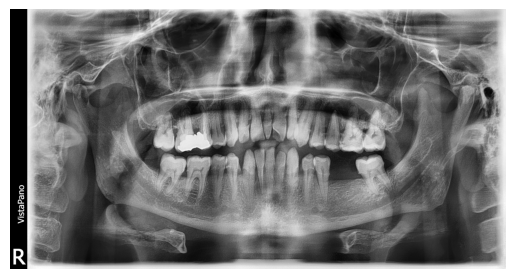

In [10]:
display_image(image_dir= image_dir)

# view a panoramic xray with bounding boxes 

In [28]:
bboxes = get_image_bbox(image_dir= image_dir)

In [29]:
bboxes

[[2185.0, 680.0, 171.0, 247.0],
 [811.0, 481.0, 159.0, 281.0],
 [883.0, 784.0, 280.0, 330.0],
 [2134.0, 477.0, 118.0, 247.0],
 [2050.0, 716.0, 243.0, 318.0],
 [1910.0, 750.0, 267.0, 331.0],
 [1822.0, 799.0, 155.0, 316.0]]

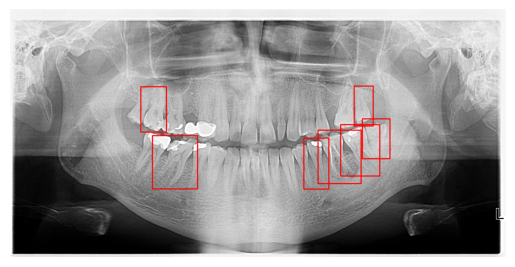

In [74]:
plot_image_with_boxes(image_dir= image_dir, bboxes= bboxes)